### Importing libraries

This section imports all libraries utilised within the programme

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Importing necessary libraries for regression models
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Importing necessary libraries for splitting data and calculating metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#import Knn from sklearn
from sklearn.neighbors import KNeighborsRegressor

### File importing and preprocessing data
This section imports all libraries utilised within the programme

In [48]:
#import data from the files
dataset = pd.read_csv('Concrete_Data_Yeh_final.csv')

#Data Preprocessing
#format as a dataframe
dataset = pd.DataFrame(dataset)#
#check for null values
dataset.isnull().sum()
#check for duplicates
dataset.duplicated().sum()
#check for data types
dataset.dtypes

y = dataset["csMPa"]
X = dataset.drop("csMPa", axis=1)

print(y.head()) 
print(X.head())

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: csMPa, dtype: float64
   cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate    age  
0          676.0   28.0  
1          676.0   28.0  
2          594.0  270.0  
3          594.0    NaN  
4          825.5  360.0  


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a preprocessing pipeline that imputes missing values with the mean 
# and scales features to have zero mean and unit variance.
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Applying the preprocessing steps to the training data and transforming the test data using the same transformations.
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

print(X_train_preprocessed.shape)
print(y_train.shape)

(824, 8)
(824,)


### Regression functions

This section defines functions for various regression models which are later compared to choose the most effective model.

The regression models included are:

1. **Linear Regression (`linear_regression`)**: This model assumes a linear relationship between the independent and dependent variables. It is simple and provides interpretable results.

2. **Decision Tree Regression (`decision_tree_regression`)**: This model uses a decision tree to predict the dependent variable based on the independent variables. It is a non-parametric method and can capture complex relationships.

3. **Random Forest Regression (`random_forest_regression`)**: This model uses a collection of decision trees to make predictions. It is robust to overfitting and can handle large datasets with many variables.

4. **Lasso Regression (`lasso_regression`)**: This model is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.

5. **Elastic Net Regression (`elastic_net_regression`)**: This model combines the properties of both Ridge Regression and LASSO Regression. It works well on datasets with many features.

6. **Ridge Regression (`ridge_regression`)**: This model is a regularization method that uses L2 regularization to prevent overfitting.

7. **Support Vector Regression (`svr_regression`)**: This model uses the principles of Support Vector Machines for regression purposes. It works well for datasets with high dimensional space.

8. **K-Nearest Neighbors Regression (`knn_regression`)**: This model predicts the value for a new instance by calculating the mean of the 'k' closest instances in the training set.

Each function splits the data into a training set and a test set, fits the model to the training data, makes predictions on the test data, and calculates several metrics to evaluate the performance of the model. These metrics include the R2 score, the mean squared error, and the mean absolute error.

---

In [21]:
def linear_regression(X, y):

    """
    This function applies the Linear Regression model to the given dataset.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The independent variables, i.e., the input for the model.
    y (numpy.ndarray or pandas.Series): The dependent variable, i.e., the output for the model.

    Returns:
    numpy.ndarray: The predicted values of the dependent variable for the test set.

    Prints:
    R2 Score: The coefficient of determination, a statistical measure of how well the regression predictions approximate the real data points.
    Mean Squared Error: The average squared difference between the estimated values and the actual value.
    Mean Absolute Error: The average absolute difference between the estimated values and the actual value.
    """
    
   #Creating the Linear Regression model
    regressor = LinearRegression()

    # Fitting the data
    regressor.fit(X_train_preprocessed, y_train)

    # Predicting the data
    y_pred = regressor.predict(X_test_preprocessed)

    return y_pred

In [93]:
def decision_tree_regression(X, y):
    """
    This function applies the Decision Tree Regression model to the given dataset.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The independent variables, i.e., the input for the model.
    y (numpy.ndarray or pandas.Series): The dependent variable, i.e., the output for the model.

    Returns:
    numpy.ndarray: The predicted values of the dependent variable for the test set.

    Prints:
    R2 Score: The coefficient of determination, a statistical measure of how well the regression predictions approximate the real data points.
    Mean Squared Error: The average squared difference between the estimated values and the actual value.
    Mean Absolute Error: The average absolute difference between the estimated values and the actual value.
    """
    # Creating the Decision Tree regressor
    regressor = DecisionTreeRegressor()

    # Fitting the data
    regressor.fit(X_train_preprocessed, y_train)

    # Predicting the data
    y_pred = regressor.predict(X_test_preprocessed)
    return y_pred

In [90]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_regression(X, y):
    """
    This function applies the Random Forest Regression model to the given dataset.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The independent variables, i.e., the input for the model.
    y (numpy.ndarray or pandas.Series): The dependent variable, i.e., the output for the model.

    Returns:
    numpy.ndarray: The predicted values of the dependent variable for the test set.

    Prints:
    R2 Score: The coefficient of determination, a statistical measure of how well the regression predictions approximate the real data points.
    Mean Squared Error: The average squared difference between the estimated values and the actual value.
    Mean Absolute Error: The average absolute difference between the estimated values and the actual value.
    """
    # Creating the Random Forest Regressor
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

    # Fitting the data
    regressor.fit(X_train_preprocessed, y_train)

    # Predicting the data
    y_pred = regressor.predict(X_test_preprocessed)

    return y_pred

In [87]:
def perform_lasso(X, y, alpha=1.0, test_size=0.2, random_state=None):
    """
    Perform Lasso Regression on the given data.

    Parameters:
    X : array-like of shape (n_samples, n_features)
        Training data

    y : array-like of shape (n_samples,)
        Target values

    alpha : float, optional (default=1.0)
        Constant that multiplies the L1 term. Defaults to 1.0.

    test_size : float, optional (default=0.2)
        Represents the proportion of the dataset to include in the test split.

    random_state : int or RandomState instance, optional (default=None)
        Controls the shuffling applied to the data before applying the split.

    Returns:
    float
        Mean squared error of the Lasso model.
    """
    # Create and train the model
    model = Lasso(alpha=alpha)
    model.fit(X_train_preprocessed, y_train)

    # Make predictions and evaluate the model
    y_pred = model.predict(X_test_preprocessed)
    return y_pred

In [25]:
def elastic_net_regression(X, y):
    """
    This function applies the Elastic Net Regression model to the given dataset.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The independent variables, i.e., the input for the model.
    y (numpy.ndarray or pandas.Series): The dependent variable, i.e., the output for the model.

    Returns:
    numpy.ndarray: The predicted values of the dependent variable for the test set.

    Prints:
    R2 Score: The coefficient of determination, a statistical measure of how well the regression predictions approximate the real data points.
    Mean Squared Error: The average squared difference between the estimated values and the actual value.
    Mean Absolute Error: The average absolute difference between the estimated values and the actual value.
    """
    
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

    # Creating the Elastic Net Regressor
    regressor = ElasticNet(random_state = 0)

    # Fitting the data
    regressor.fit(X_train, y_train)

    # Predicting the data
    y_pred = regressor.predict(X_test)

    # Calculating the r2 score
    print("R2 Score:", r2_score(y_test, y_pred))

    # Calculating the mean squared error
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

    # Calculating the mean absolute error
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

    return y_pred

In [78]:
def ridge_regression(X, y):
    """
    This function applies the Ridge Regression model to the given dataset.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The independent variables, i.e., the input for the model.
    y (numpy.ndarray or pandas.Series): The dependent variable, i.e., the output for the model.

    Returns:
    numpy.ndarray: The predicted values of the dependent variable for the test set.

    Prints:
    R2 Score: The coefficient of determination, a statistical measure of how well the regression predictions approximate the real data points.
    Mean Squared Error: The average squared difference between the estimated values and the actual value.
    Mean Absolute Error: The average absolute difference between the estimated values and the actual value.
    """
    
    # Creating the Ridge Regressor
    regressor = Ridge(random_state = 0)

    # Fitting the data
    regressor.fit(X_train_preprocessed, y_train)

    # Predicting the data
    y_pred = regressor.predict(X_test_preprocessed)

    return y_pred

In [27]:
def perform_svr(X, y, kernel='rbf', C=1.0, epsilon=0.1, test_size=0.2, random_state=None):
    """
    Perform Support Vector Regression (SVR) on the given data.

    Parameters:
    X : array-like of shape (n_samples, n_features)
        Training data

    y : array-like of shape (n_samples,)
        Target values

    kernel : string, optional (default='rbf')
        Specifies the kernel type to be used in the algorithm.
        It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable.

    C : float, optional (default=1.0)
        Regularization parameter. The strength of the regularization is inversely proportional to C.
        Must be strictly positive.

    epsilon : float, optional (default=0.1)
        Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

    test_size : float, optional (default=0.2)
        Represents the proportion of the dataset to include in the test split.

    random_state : int or RandomState instance, optional (default=None)
        Controls the shuffling applied to the data before applying the split.

    Returns:
    float
        Mean squared error of the SVR model.
    """
    # Create and train the model
    model = SVR(kernel=kernel, C=C, epsilon=epsilon)
    model.fit(X_train_preprocessed, y_train)

    # Make predictions and evaluate the model
    y_pred = model.predict(X_test_preprocessed)
    return y_pred

In [83]:
def perform_knn(X, y, n_neighbors=5, test_size=0.2, random_state=None):
    """
    Perform K-Nearest Neighbors Regression on the given data.

    Parameters:
    X : array-like of shape (n_samples, n_features)
        Training data

    y : array-like of shape (n_samples,)
        Target values

    n_neighbors : int, optional (default=5)
        Number of neighbors to use by default for kneighbors queries.

    test_size : float, optional (default=0.2)
        Represents the proportion of the dataset to include in the test split.

    random_state : int or RandomState instance, optional (default=None)
        Controls the shuffling applied to the data before applying the split.

    Returns:
    float
        Mean squared error of the KNN model.
    """

    # Create and train the model
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train_preprocessed, y_train)

    # Make predictions and evaluate the model
    y_pred = model.predict(X_test_preprocessed)
    return y_pred

### Model Evaluation

This section analyses the performance of each regression model to determine which technique most accuratley predicts compressive strength
    
    
    

In [ ]:
def modelVarTest(dataset):
    """
    This function applies various regression models to each column of the given dataset.

    Parameters:
    dataset (pandas.DataFrame): The dataset where each column is treated as a dependent variable in turn, with the other columns serving as independent variables.

    Prints:
    For each column, the function prints the name of the column, the regression model used, and the performance metrics of the model (R2 Score, Mean Squared Error, Mean Absolute Error).

    Note:
    The specific regression models used and the way in which the data is split into independent and dependent variables would depend on the implementation within the function.
    """
    
    # Define the models
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree Regression': decision_tree_regression(),
        'Random Forest Regression': random_forest_regression(),
        'Ridge': Ridge(),
        'KNN Regression': KNeighborsRegressor(n_neighbors=5),
        'Lasso': Lasso(),
        'Elastic Net': ElasticNet()
            }

    # Get the column names
    column_names = dataset.columns[:-1]

    # Loop over each model
    for model_name, model in models.items():
        print(f"Testing {model_name}")

        # Loop over each column
        for column in column_names:
            # Create the features (X) and target (y)
            X = dataset[[column]].values
            y = dataset.iloc[:, -1].values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

            # Fit the model
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # Print the R2 score
            print(f"R2 Score for {column}: {r2_score(y_test, y_pred)}")

            # Print the Mean Squared Error
            print(f"Mean Squared Error for {column}: {mean_squared_error(y_test, y_pred)}")

            # Print the Mean Absolute Error
            print(f"Mean Absolute Error for {column}: {mean_absolute_error(y_test, y_pred)}")

# Call the function
modelVarTest(dataset)

V2

In [ ]:
# List of regression models to test
models = [LinearRegression(), ElasticNet(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor()]

# Generate all combinations of variables
for r in range(1, len(X.columns) + 1):
    for variables in combinations(X.columns, r):
        X_subset = X[list(variables)]

        # Fit each model to the data
        for model in models:
            scores = cross_val_score(model, X_subset, y, cv=5)
            print(f'Model: {model.__class__.__name__}, Variables: {variables}, Score: {np.mean(scores)}')

### Model Predictions
    
    

(824,)
(824, 8)


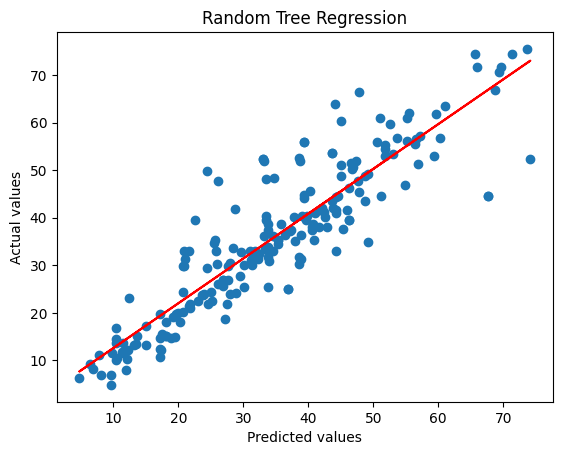

In [94]:
#plot decision tree y_pred against y_test

print(y_train.shape)
print(X_train_preprocessed.shape)

y_= decision_tree_regression(X_train_preprocessed, y_train)
plt.scatter(y_, y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Random Tree Regression")
#add a trendline
z = np.polyfit(y_, y_test, 1)
p = np.poly1d(z)
plt.plot(y_,p(y_), color='red')

plt.show()
